In [2]:
!nvidia-smi

Fri Nov 14 17:48:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
#"We have commented out this section as the dataset has already been downloaded."
'''
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/adarshrouniyar/air-pollution-image-dataset-from-india-and-nepal")
'''

'\nimport opendatasets as od\n \nod.download(\n    "https://www.kaggle.com/datasets/adarshrouniyar/air-pollution-image-dataset-from-india-and-nepal")\n'

In [4]:
import os

current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: /content


In [5]:
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/archive (2)/Dataset_for_AQI_Classification/Dataset_for_AQI_Classification/train_data.csv')
df_train

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,Tamil Nadu,TN_UnFSG_2023-03-02-08.30-1.jpg,2023,3,2,8:30,119,69.00,106.00,8.00,358.00,22.00,26.00,c_Unhealthy_for_Sensitive_Groups
1,Bengaluru,BENGR_Mod_2023-02-24-08.30-1-166.jpg,2023,2,24,8:30,68,32.00,61.00,26.00,228.00,5.00,21.00,b_Moderate
2,"Biratnagar, Nepal",BIR_UNFSG_VF_2023-02-03-15.00-2-24.jpg,2023,2,3,15:00,141,47.96,68.92,65.57,0.41,2.80,2.51,c_Unhealthy_for_Sensitive_Groups
3,Mumbai,MH_UnFSG_2023-03-10-16.00-1-76.jpg,2023,3,10,16:00,141,72.00,108.00,NaN,NaN,NaN,63.00,c_Unhealthy_for_Sensitive_Groups
4,"ITO, Delhi",DEL_SEV_2023-02-07-14.00-2-8.jpg,2023,2,7,14:00,449,337.00,198.00,23.00,24.00,13.00,57.00,f_Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7828,"Biratnagar, Nepal",BRI_Un_2023-02-09-08.00-1.jpg,2023,2,9,8:00,171,112.46,163.45,31.17,0.96,3.84,18.78,d_Unhealthy
7829,"ITO, Delhi",DEL_SEV_2023-02-17-13.00-2-25.jpg,2023,2,17,13:00,372,348.00,199.00,25.00,67.00,10.00,107.00,f_Severe
7830,"New Ind Town, Faridabad",HAR_VUN_2022-10-02-10.00-1-1489.jpg,2022,10,2,10:00,230,185.00,199.00,10.00,52.00,12.00,26.00,e_Very_Unhealthy
7831,Mumbai,MH_UnFSG_2023-03-14-13.00-1-385.jpg,2023,3,14,13:00,138,90.00,120.00,143.00,21.00,9.00,16.00,c_Unhealthy_for_Sensitive_Groups


/tmp/ipython-input-3257786406.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train,x='Modified_AQI_Class', order=custom_order, palette='Set2')


<Axes: title={'center': 'Class Distribution of Training Dataset'}, xlabel='Modified_AQI_Class', ylabel='count'>

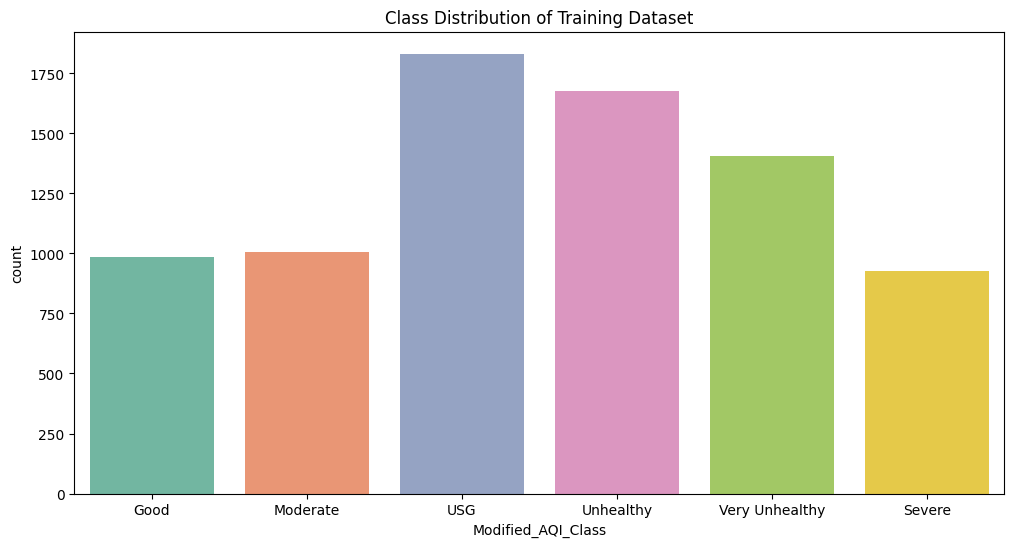

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming AQI_Class column contains categories like 'a_Good', 'b_Moderate', etc.
# You can create a new column with the modified category labels

# Define a mapping dictionary to map the old labels to the new labels
category_mapping = {
    'a_Good': 'Good',
    'b_Moderate': 'Moderate',
    'c_Unhealthy_for_Sensitive_Groups': 'USG',
    'd_Unhealthy' : 'Unhealthy',
    'e_Very_Unhealthy' : 'Very Unhealthy',
    'f_Severe' : 'Severe'
}

# Apply the mapping to create a new column with modified category labels
df_train['Modified_AQI_Class'] = df_train['AQI_Class'].map(category_mapping)

# Now, you can plot the count of modified categories
plt.figure(figsize=(12,6))
plt.title('Class Distribution of Training Dataset')
custom_order = ['Good', 'Moderate', 'USG', 'Unhealthy', 'Very Unhealthy', 'Severe']
sns.countplot(data=df_train,x='Modified_AQI_Class', order=custom_order, palette='Set2')

In [7]:
import numpy as np
min_pm2_lable = np.min(df_train['PM2.5'])
max_pm2_lable = np.max(df_train['PM2.5'])
mean_pm2_lable = np.mean(df_train['PM2.5'])
stdev_pm2_lable = np.std(df_train['PM2.5'])
severe = np.count_nonzero(df_train['PM2.5'] > 250.5)
good = np.count_nonzero(df_train['PM2.5'] < 12.1)
moderate = np.count_nonzero((df_train['PM2.5'] > 12) & (df_train['PM2.5'] < 35.5))
sensitive = np.count_nonzero((df_train['PM2.5'] > 35.4) & (df_train['PM2.5'] < 55.5))
unhealthy = np.count_nonzero((df_train['PM2.5'] > 55.4) & (df_train['PM2.5'] < 150.5))
vunhealthy = np.count_nonzero((df_train['PM2.5'] > 150.4) & (df_train['PM2.5'] < 250.5))
print('Minimum label value for PM2.5 :', min_pm2_lable)
print('Maximum label value for PM2.5 :', max_pm2_lable)
print('Average label value for PM2.5 :', mean_pm2_lable)
print('Standard Deviation label value for PM2.5 :', stdev_pm2_lable)
print('Severe class based on PM2.5 value :', severe)
print('Very Unhealthy class based on PM2.5 value :', vunhealthy)
print('Unhealthy class based on PM2.5 value :', unhealthy)
print('Sensitive class based on PM2.5 value :', sensitive)
print('Moderate class based on PM2.5 value :', moderate)
print('Good class based on PM2.5 value :', good)

Minimum label value for PM2.5 : 4.0
Maximum label value for PM2.5 : 500.0
Average label value for PM2.5 : 142.61533256734327
Standard Deviation label value for PM2.5 : 130.0911373860473
Severe class based on PM2.5 value : 2120
Very Unhealthy class based on PM2.5 value : 855
Unhealthy class based on PM2.5 value : 1851
Sensitive class based on PM2.5 value : 959
Moderate class based on PM2.5 value : 1993
Good class based on PM2.5 value : 55


In [8]:
'''
Statsmodels is a Python library that provides classes and functions for estimating and interpreting various statistical models.
It offers a wide range of tools for statistical analysis, hypothesis testing, and data exploration.
'''
#!pip install statsmodels

'\nStatsmodels is a Python library that provides classes and functions for estimating and interpreting various statistical models. \nIt offers a wide range of tools for statistical analysis, hypothesis testing, and data exploration. \n'

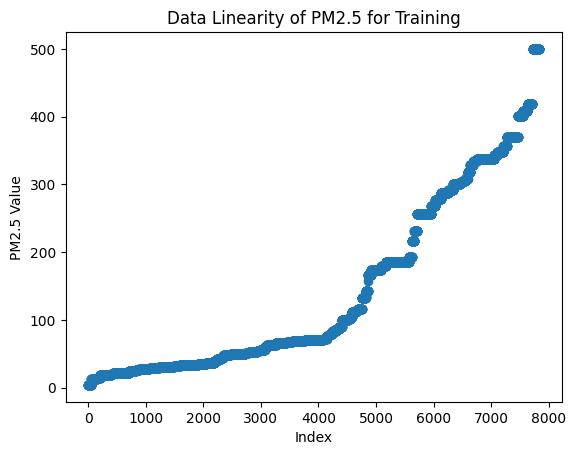

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 4.792e+04
Date:                Fri, 14 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:51:00   Log-Likelihood:                -41560.
No. Observations:                7833   AIC:                         8.312e+04
Df Residuals:                    7831   BIC:                         8.314e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.2586      1.102    -60.135      0.0

In [9]:
import statsmodels.api as sm
df_pm25 = df_train['PM2.5'].sort_values()
df_pm25 = df_pm25.reset_index(drop=True)
x = df_pm25.index
y = df_pm25
plt.xlabel('Index')
plt.ylabel('PM2.5 Value')
plt.title('Data Linearity of PM2.5 for Training')
plt.scatter(x, y)
plt.show()
# Fit the linear regression model
cX = sm.add_constant(x)
model = sm.OLS(y, cX).fit()
print(model.summary())

In [10]:
df_val = pd.read_csv('/content/drive/MyDrive/Dataset_for_AQI_Classification/val_data.csv')
df_val

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,Bengaluru,BENGR_Mod_2023-02-23-08.30-1-401.jpg,2023,2,23,8:30,97,43.00,78.00,26.00,258.00,10.00,17.00,b_Moderate
1,"ITO, Delhi",DEL_SEV_2023-02-22-14.00-2-221.jpg,2023,2,22,14:00,450,500.00,480.00,91.00,78.00,17.00,47.00,f_Severe
2,"New Ind Town, Faridabad",HAR_VUN_2022-10-02-10.00-1-2361.jpg,2022,10,2,10:00,230,185.00,199.00,10.00,52.00,12.00,26.00,e_Very_Unhealthy
3,"ITO, Delhi",DEL_VUnH_2023-02-16-14.00-2-7.jpg,2023,2,16,14:00,268,401.00,325.00,73.00,88.00,16.00,NaN,e_Very_Unhealthy
4,Mumbai,MH_Good_2023-03-23-17.00-2.jpg,2023,3,23,17:00,47,14.00,41.00,35.00,6.00,5.00,7.00,a_Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,"ITO, Delhi",DEL_SEV_2023-02-07-14.00-1-103.jpg,2023,2,7,14:00,449,337.00,198.00,23.00,24.00,13.00,57.00,f_Severe
1955,"ITO, Delhi",DEL_SEV_2023-02-20-14.00-2-156.jpg,2023,2,20,14:00,363,257.00,139.00,41.00,65.00,35.00,83.00,f_Severe
1956,"ITO, Delhi",DEL_SEV_2023-02-22-14.00-2-96.jpg,2023,2,22,14:00,450,500.00,480.00,91.00,78.00,17.00,47.00,f_Severe
1957,"Biratnagar, Nepal",BIR_UNH_VF_2023-02-02- 1700-3-72.jpg,2023,2,2,17:00,156,67.06,95.93,52.38,0.52,3.35,6.49,d_Unhealthy


/tmp/ipython-input-3406532971.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_val,x='Modified_AQI_Class', order=custom_order, palette='Set2')


<Axes: title={'center': 'Class Distribution of Validation Dataset'}, xlabel='Modified_AQI_Class', ylabel='count'>

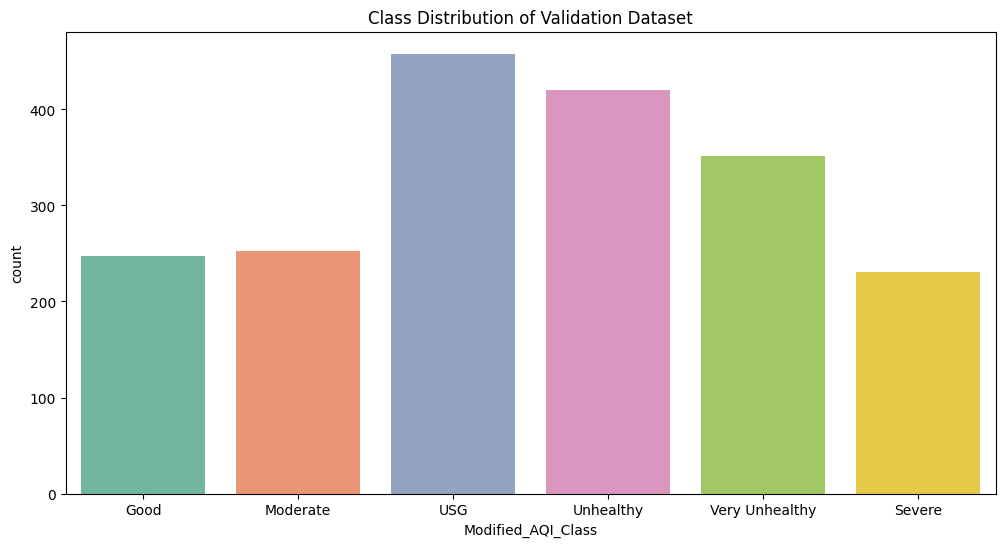

In [11]:
category_mapping = {
    'a_Good': 'Good',
    'b_Moderate': 'Moderate',
    'c_Unhealthy_for_Sensitive_Groups': 'USG',
    'd_Unhealthy' : 'Unhealthy',
    'e_Very_Unhealthy' : 'Very Unhealthy',
    'f_Severe' : 'Severe'
}

# Apply the mapping to create a new column with modified category labels
df_val['Modified_AQI_Class'] = df_val['AQI_Class'].map(category_mapping)

# Now, you can plot the count of modified categories
plt.figure(figsize=(12,6))
plt.title('Class Distribution of Validation Dataset')
custom_order = ['Good', 'Moderate', 'USG', 'Unhealthy', 'Very Unhealthy', 'Severe']
sns.countplot(data=df_val,x='Modified_AQI_Class', order=custom_order, palette='Set2')

In [12]:
min_pm2_lable = np.min(df_val['PM2.5'])
max_pm2_lable = np.max(df_val['PM2.5'])
mean_pm2_lable = np.mean(df_val['PM2.5'])
stdev_pm2_lable = np.std(df_val['PM2.5'])
severe = np.count_nonzero(df_val['PM2.5'] > 250.5)
good = np.count_nonzero(df_val['PM2.5'] < 12.1)
moderate = np.count_nonzero((df_val['PM2.5'] > 12) & (df_val['PM2.5'] < 35.5))
sensitive = np.count_nonzero((df_val['PM2.5'] > 35.4) & (df_val['PM2.5'] < 55.5))
unhealthy = np.count_nonzero((df_val['PM2.5'] > 55.4) & (df_val['PM2.5'] < 150.5))
vunhealthy = np.count_nonzero((df_val['PM2.5'] > 150.4) & (df_val['PM2.5'] < 250.5))
print('Minimum label value for PM2.5 :', min_pm2_lable)
print('Maximum label value for PM2.5 :', max_pm2_lable)
print('Average label value for PM2.5 :', mean_pm2_lable)
print('Standard Deviation label value for PM2.5 :', stdev_pm2_lable)
print('Severe class based on PM2.5 value :', severe)
print('Very Unhealthy class based on PM2.5 value :', vunhealthy)
print('Unhealthy class based on PM2.5 value :', unhealthy)
print('Sensitive class based on PM2.5 value :', sensitive)
print('Moderate class based on PM2.5 value :', moderate)
print('Good class based on PM2.5 value :', good)

Minimum label value for PM2.5 : 4.0
Maximum label value for PM2.5 : 500.0
Average label value for PM2.5 : 143.66196528841243
Standard Deviation label value for PM2.5 : 132.8791784590798
Severe class based on PM2.5 value : 539
Very Unhealthy class based on PM2.5 value : 202
Unhealthy class based on PM2.5 value : 449
Sensitive class based on PM2.5 value : 261
Moderate class based on PM2.5 value : 499
Good class based on PM2.5 value : 9


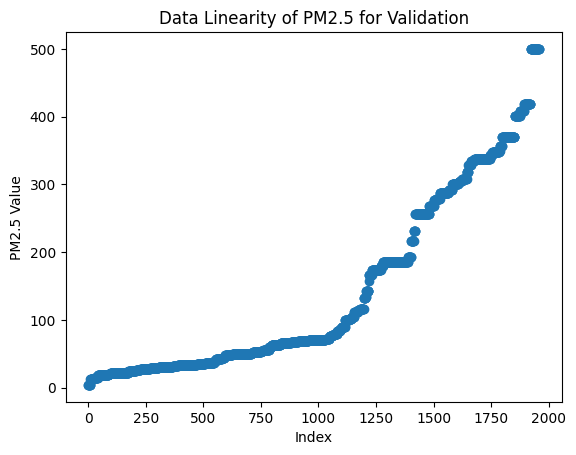

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.121e+04
Date:                Fri, 14 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:51:06   Log-Likelihood:                -10491.
No. Observations:                1959   AIC:                         2.099e+04
Df Residuals:                    1957   BIC:                         2.100e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.5872      2.315    -29.622      0.0

In [13]:
df_pm25_val = df_val['PM2.5'].sort_values()
df_pm25_val = df_pm25_val.reset_index(drop=True)
x = df_pm25_val.index
y = df_pm25_val
plt.xlabel('Index')
plt.ylabel('PM2.5 Value')
plt.title('Data Linearity of PM2.5 for Validation')
plt.scatter(x, y)
plt.show()
# Fit the linear regression model
cX = sm.add_constant(x)
model = sm.OLS(y, cX).fit()
print(model.summary())

In [14]:
df_test = pd.read_csv('/content/drive/MyDrive/Dataset_for_AQI_Classification/testing_data.csv')
df_test = df_test.sample(frac=1).reset_index(drop=True)
df_test

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,Bengaluru,BENGR_Mod_2023-02-21-08.30-1-231.jpg,2023,2,21,8:30,56,27.0,53.0,27.0,265.0,19.0,16.0,b_Moderate
1,"ITO, Delhi",DEL_SEV_2023-02-20-14.00-1-486.jpg,2023,2,20,14:00,363,257.0,139.0,41.0,65.0,35.0,83.0,f_Severe
2,Bengaluru,BENGR_Good_2023-02-26-08.30-1-66.jpg,2023,2,26,8:30,48,24.0,47.0,17.0,210.0,13.0,14.0,a_Good
3,Tamil Nadu,TN_UnFSG_2023-03-08-08.30-1-156.jpg,2023,3,8,8:30,121,71.0,111.0,10.0,407.0,20.0,22.0,c_Unhealthy_for_Sensitive_Groups
4,Bengaluru,BENGR_Good_2023-02-26-08.30-1-446.jpg,2023,2,26,8:30,48,24.0,47.0,17.0,210.0,13.0,14.0,a_Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,"Knowledge park, Greater Noida",UP_UHFSG_2023-03-06-11.30-1-65.jpg,2023,3,6,11:30,104,100.0,185.0,8.0,28.0,30.0,44.0,c_Unhealthy_for_Sensitive_Groups
2444,Bengaluru,BENGR_Mod_2023-02-25-08.30-1-486.jpg,2023,2,25,8:30,73,29.0,64.0,23.0,189.0,7.0,16.0,b_Moderate
2445,Mumbai,MH_UnFSG_2023-03-14-13.00-1-7.jpg,2023,3,14,13:00,138,90.0,120.0,143.0,21.0,9.0,16.0,c_Unhealthy_for_Sensitive_Groups
2446,"ITO, Delhi",DEL_VUnH_2023-02-16-14.30-1-60.jpg,2023,2,16,14:30,245,337.0,272.0,85.0,60.0,28.0,108.0,e_Very_Unhealthy


/tmp/ipython-input-308929186.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_test,x='Modified_AQI_Class', order=custom_order, palette='Set2')


<Axes: title={'center': 'Class Distribution of Testing Dataset'}, xlabel='Modified_AQI_Class', ylabel='count'>

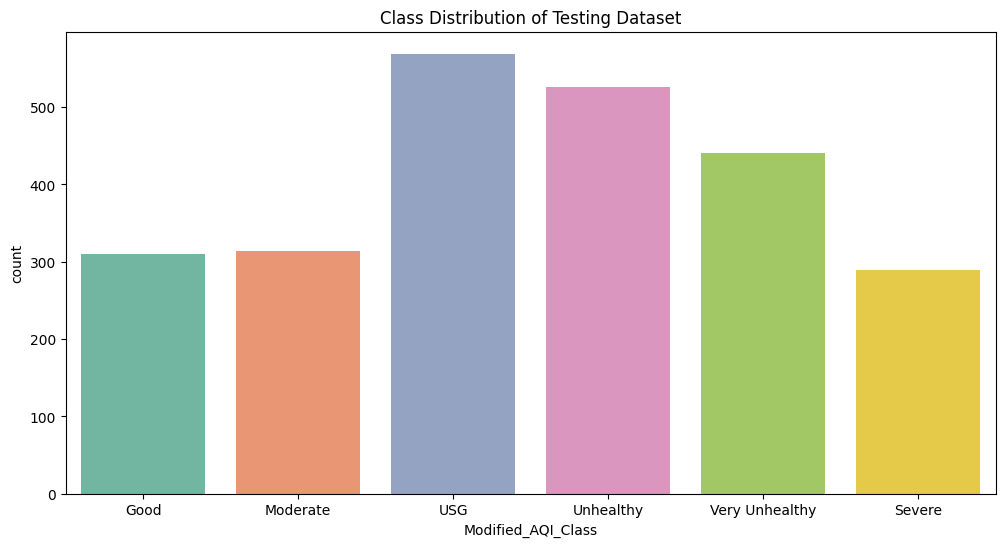

In [15]:
category_mapping = {
    'a_Good': 'Good',
    'b_Moderate': 'Moderate',
    'c_Unhealthy_for_Sensitive_Groups': 'USG',
    'd_Unhealthy' : 'Unhealthy',
    'e_Very_Unhealthy' : 'Very Unhealthy',
    'f_Severe' : 'Severe'
}

# Apply the mapping to create a new column with modified category labels
df_test['Modified_AQI_Class'] = df_test['AQI_Class'].map(category_mapping)

# Now, you can plot the count of modified categories
plt.figure(figsize=(12,6))
plt.title('Class Distribution of Testing Dataset')
custom_order = ['Good', 'Moderate', 'USG', 'Unhealthy', 'Very Unhealthy', 'Severe']
sns.countplot(data=df_test,x='Modified_AQI_Class', order=custom_order, palette='Set2')

In [16]:
min_pm2_lable = np.min(df_test['PM2.5'])
max_pm2_lable = np.max(df_test['PM2.5'])
mean_pm2_lable = np.mean(df_test['PM2.5'])
stdev_pm2_lable = np.std(df_test['PM2.5'])
severe = np.count_nonzero(df_test['PM2.5'] > 250.5)
good = np.count_nonzero(df_test['PM2.5'] < 12.1)
moderate = np.count_nonzero((df_test['PM2.5'] > 12) & (df_test['PM2.5'] < 35.5))
sensitive = np.count_nonzero((df_test['PM2.5'] > 35.4) & (df_test['PM2.5'] < 55.5))
unhealthy = np.count_nonzero((df_test['PM2.5'] > 55.4) & (df_test['PM2.5'] < 150.5))
vunhealthy = np.count_nonzero((df_test['PM2.5'] > 150.4) & (df_test['PM2.5'] < 250.5))
print('Minimum label value for PM2.5 :', min_pm2_lable)
print('Maximum label value for PM2.5 :', max_pm2_lable)
print('Average label value for PM2.5 :', mean_pm2_lable)
print('Standard Deviation label value for PM2.5 :', stdev_pm2_lable)
print('Severe class based on PM2.5 value :', severe)
print('Very Unhealthy class based on PM2.5 value :', vunhealthy)
print('Unhealthy class based on PM2.5 value :', unhealthy)
print('Sensitive class based on PM2.5 value :', sensitive)
print('Moderate class based on PM2.5 value :', moderate)
print('Good class based on PM2.5 value :', good)

Minimum label value for PM2.5 : 4.0
Maximum label value for PM2.5 : 500.0
Average label value for PM2.5 : 143.99029411764707
Standard Deviation label value for PM2.5 : 131.34486506303367
Severe class based on PM2.5 value : 673
Very Unhealthy class based on PM2.5 value : 263
Unhealthy class based on PM2.5 value : 598
Sensitive class based on PM2.5 value : 278
Moderate class based on PM2.5 value : 615
Good class based on PM2.5 value : 21


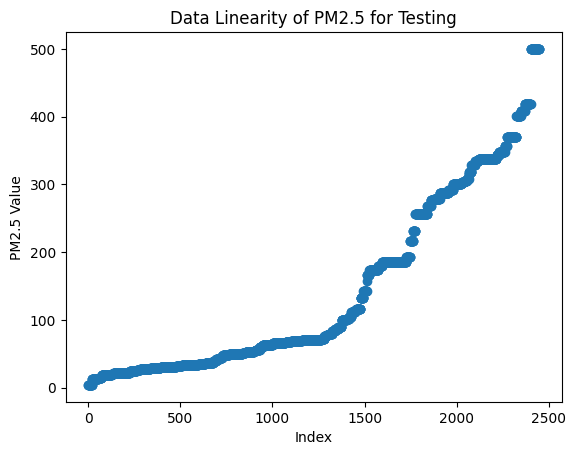

                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 1.509e+04
Date:                Fri, 14 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:51:27   Log-Likelihood:                -13004.
No. Observations:                2448   AIC:                         2.601e+04
Df Residuals:                    2446   BIC:                         2.602e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.9560      1.983    -33.761      0.0

In [17]:
df_pm25_test = df_test['PM2.5'].sort_values()
df_pm25_test = df_pm25_test.reset_index(drop=True)
x = df_pm25_test.index
y = df_pm25_test
plt.xlabel('Index')
plt.ylabel('PM2.5 Value')
plt.title('Data Linearity of PM2.5 for Testing')
plt.scatter(x, y)
plt.show()
# Fit the linear regression model
cX = sm.add_constant(x)
model = sm.OLS(y, cX).fit()
print(model.summary())

In [18]:
#Import all necessary library
import sys
import numpy as np

from typing import Dict, Optional, Tuple
from pathlib import Path

import math
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from tensorflow.keras import backend #Keras version 2.1.6
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Concatenate, LeakyReLU, Input, Conv2D, MaxPooling2D, BatchNormalization, Add

from tensorflow.keras import layers

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
#from PIL import Image

from sklearn.metrics import r2_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


%matplotlib inline

#os.environ["CUDA_VISIBLE_DEVICES"] = '1'

In [19]:
#Preparing label data for Training
y_train = df_train[['AQI','PM2.5','PM10','O3','CO','SO2','NO2']].copy()
y_train


,AQI,PM2.5,PM10,O3,CO,SO2,NO2
0,119,69.00,106.00,8.00,358.00,22.00,26.00
1,68,32.00,61.00,26.00,228.00,5.00,21.00
2,141,47.96,68.92,65.57,0.41,2.80,2.51
3,141,72.00,108.00,NaN,NaN,NaN,63.00
4,449,337.00,198.00,23.00,24.00,13.00,57.00
...,...,...,...,...,...,...,...
7828,171,112.46,163.45,31.17,0.96,3.84,18.78
7829,372,348.00,199.00,25.00,67.00,10.00,107.00
7830,230,185.00,199.00,10.00,52.00,12.00,26.00
7831,138,90.00,120.00,143.00,21.00,9.00,16.00


In [20]:
#Preparing label data for Validation
y_val = df_val[['AQI','PM2.5','PM10','O3','CO','SO2','NO2']].copy()
y_val

,AQI,PM2.5,PM10,O3,CO,SO2,NO2
0,97,43.00,78.00,26.00,258.00,10.00,17.00
1,450,500.00,480.00,91.00,78.00,17.00,47.00
2,230,185.00,199.00,10.00,52.00,12.00,26.00
3,268,401.00,325.00,73.00,88.00,16.00,NaN
4,47,14.00,41.00,35.00,6.00,5.00,7.00
...,...,...,...,...,...,...,...
1954,449,337.00,198.00,23.00,24.00,13.00,57.00
1955,363,257.00,139.00,41.00,65.00,35.00,83.00
1956,450,500.00,480.00,91.00,78.00,17.00,47.00
1957,156,67.06,95.93,52.38,0.52,3.35,6.49


In [21]:
#Preparing label data for Testing
y_test = df_test[['AQI','PM2.5','PM10','O3','CO','SO2','NO2']].copy()
y_test

,AQI,PM2.5,PM10,O3,CO,SO2,NO2
0,56,27.0,53.0,27.0,265.0,19.0,16.0
1,363,257.0,139.0,41.0,65.0,35.0,83.0
2,48,24.0,47.0,17.0,210.0,13.0,14.0
3,121,71.0,111.0,10.0,407.0,20.0,22.0
4,48,24.0,47.0,17.0,210.0,13.0,14.0
...,...,...,...,...,...,...,...
2443,104,100.0,185.0,8.0,28.0,30.0,44.0
2444,73,29.0,64.0,23.0,189.0,7.0,16.0
2445,138,90.0,120.0,143.0,21.0,9.0,16.0
2446,245,337.0,272.0,85.0,60.0,28.0,108.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=11d4ef3ca17424d16c7f0d8eeb7c500e0c20935965701ca744e53a78b9ac9c39
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
Total rows in CSV: 7833
Example row:                                            full_path
0  c_Unhealthy_for_Sensitive_Groups/TN_UnFSG_2023...
1    b_Moderate/BENGR_Mod_2023-02-24-08.30-1-166.jpg
2  c_Unhealthy_for_Sensitive_Groups/BIR_UNFSG_VF_...
3  c_Unhealthy_for_Sensitive_Groups/MH_UnFSG_2023...
4          f_Severe/DEL_SEV_2023-02-07-14.00-2-8.jpg
Found 6658 validated image filenames belonging to 6 classes.
Found 1175 validated image filenames belonging to 6 classes.
Number of classes: 6
Class indices: {'a_Good': 0, 'b_Moderate': 1, 'c_Unhealthy_for_Sensitive_Groups': 2, 'd_Unhealthy': 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,587,462 (9.87 MB)

 Trainable params: 329,478 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.3111 - loss: 1.7125

209/209 ━━━━━━━━━━━━━━━━━━━━ 2432s 12s/step - accuracy: 0.3115 - loss: 1.7116 - val_accuracy: 0.5643 - val_loss: 1.1437 - learning_rate: 1.0000e-04
Epoch 2/4
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4914 - loss: 1.2606

209/209 ━━━━━━━━━━━━━━━━━━━━ 396s 2s/step - accuracy: 0.4915 - loss: 1.2604 - val_accuracy: 0.6579 - val_loss: 0.9523 - learning_rate: 1.0000e-04
Epoch 3/4
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5860 - loss: 1.0778

209/209 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.5860 - loss: 1.0777 - val_accuracy: 0.6987 - val_loss: 0.8468 - learning_rate: 1.0000e-04
Epoch 4/4
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6224 - loss: 0.9742

209/209 ━━━━━━━━━━━━━━━━━━━━ 405s 2s/step - accuracy: 0.6224 - loss: 0.9741 - val_accuracy: 0.7311 - val_loss: 0.7581 - learning_rate: 1.0000e-04


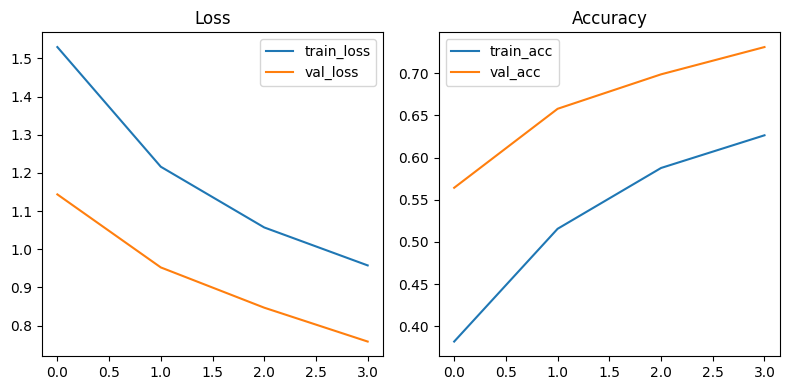

Explaining: /content/drive/MyDrive/archive (2)/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP/b_Moderate/BENGR_Mod_2023-03-06-08.30-1-451.jpg true label: b_Moderate


  0%|          | 0/500 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 670ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

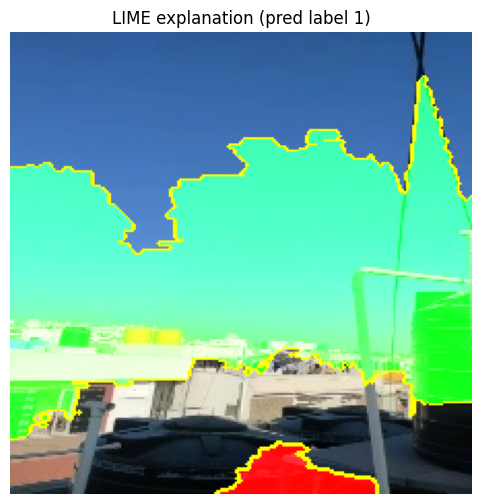

Saved model to: models
Saved training curves and LIME image to: results


In [1]:
# full_pipeline_with_lime.py
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from skimage.io import imread
from skimage.transform import resize
from skimage.segmentation import mark_boundaries

# Install lime if not already installed
!pip install lime
from lime import lime_image

# -----------------------
# 1. Paths & settings
# -----------------------
csv_path = "/content/drive/MyDrive/archive (2)/Dataset_for_AQI_Classification/Dataset_for_AQI_Classification/train_data.csv"
# base image directory which contains class subfolders (a_Good, b_Moderate, ...)
base_path = "/content/drive/MyDrive/archive (2)/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/IND_and_NEP"

OUT_MODELS = "models"
OUT_RESULTS = "results"
os.makedirs(OUT_MODELS, exist_ok=True)
os.makedirs(OUT_RESULTS, exist_ok=True)

# model / training params
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 4         # lower for quick tests; increase for final training

# -----------------------
# 2. Read CSV & prepare dataframe
# -----------------------
df = pd.read_csv(csv_path)
# create a column that points to subfolder/filename relative to base_path
df["full_path"] = df["AQI_Class"].astype(str).str.strip() + "/" + df["Filename"].astype(str).str.strip()

# Optionally inspect:
print("Total rows in CSV:", len(df))
print("Example row:", df[["full_path"]].head())

# -----------------------
# 3. Split into train/val
# -----------------------
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.15, random_state=42, stratify=df["AQI_Class"])

# -----------------------
# 4. Create generators (use preprocess_input for MobileNetV2)
# -----------------------
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   horizontal_flip=True,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.1)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=base_path,
    x_col="full_path",
    y_col="AQI_Class",
    target_size=IMG_SIZE,
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=base_path,
    x_col="full_path",
    y_col="AQI_Class",
    target_size=IMG_SIZE,
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=False
)

num_classes = len(train_gen.class_indices)
print("Number of classes:", num_classes)
print("Class indices:", train_gen.class_indices)

# -----------------------
# 5. Build model (MobileNetV2 transfer learning)
# -----------------------
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(*IMG_SIZE, 3))
base_model.trainable = False   # freeze base for initial training

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

# -----------------------
# 6. Callbacks
# -----------------------
cb = [
    callbacks.ModelCheckpoint(os.path.join(OUT_MODELS, "mobilenet_aqi_best.h5"), monitor="val_loss", save_best_only=True),
    callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2)
]

# -----------------------
# 7. Train
# -----------------------
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=cb
)

# Save final model
model.save(os.path.join(OUT_MODELS, "mobilenet_aqi_final.h5"))

# Plot training curves
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend()
plt.title("Accuracy")

plt.tight_layout()
plt.savefig(os.path.join(OUT_RESULTS, "training_curves.png"))
plt.show()

# -----------------------
# 8. LIME explanation for a single sample
# -----------------------
# We will explain a single sample from validation set.

# pick one row from val_df (index 0 of val_df)
sample_row = val_df.iloc[0]
sample_rel_path = sample_row["full_path"]
sample_label = sample_row["AQI_Class"]
sample_path = os.path.join(base_path, sample_rel_path)
print("Explaining:", sample_path, "true label:", sample_label)

# load raw image for LIME (RGB)
raw_image = imread(sample_path)
# resize for model input (LIME expects original raw image - we will resize inside predictor)
if raw_image.shape[0] != IMG_SIZE[0] or raw_image.shape[1] != IMG_SIZE[1]:
    raw_for_model = resize(raw_image, (*IMG_SIZE, 3), preserve_range=True).astype(np.uint8)
else:
    raw_for_model = raw_image

# define prediction function required by LIME
def predict_fn(images):
    # images: list/np.array of HxWx3 uint8 images in range 0-255
    # convert to float and preprocess exactly like our generator
    imgs = np.array([preprocess_input(resize(img, (*IMG_SIZE,3), preserve_range=True).astype(np.float32)) for img in images])
    preds = model.predict(imgs)
    return preds

explainer = lime_image.LimeImageExplainer()

# explain_instance expects a HxWx3 image
explanation = explainer.explain_instance(
    raw_image,
    classifier_fn=predict_fn,
    top_labels=5,
    hide_color=0,
    num_samples=500  # increase for more stable explanations, costs time
)

# get image and mask for top predicted label
top_pred_label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(top_pred_label, positive_only=False, num_features=10, hide_rest=False)
img_boundry = mark_boundaries(temp / 255.0, mask)

# Save the LIME explanation image
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.title(f"LIME explanation (pred label {top_pred_label})")
plt.imshow(img_boundry)
plt.axis("off")
plt.savefig(os.path.join(OUT_RESULTS, "lime_explanation.png"), bbox_inches="tight")
plt.show()

print("Saved model to:", OUT_MODELS)
print("Saved training curves and LIME image to:", OUT_RESULTS)